<a href="https://colab.research.google.com/github/JyothiSridevi/Movie-Recoomendation-System/blob/main/Movie_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5953 sha256=be59fc48719251f3991fe087d19e06b7cd4ea4066e549b6152fc09fdff97248b
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_excel('Movie Recommendation.xlsx', header = None)
transactions = []
for i in range(dataset.shape[0]):
    transactions.append([str(dataset.values[i, j]) for j in range(0, 20)])

In [ ]:
from apyori import apriori
rules = apriori(transactions = transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2, max_length = 2)

In [ ]:
results = list(rules)

In [ ]:
results

[RelationRecord(items=frozenset({'Captain America', 'Black Panther'}), support=0.00334851326011251, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Captain America'}), items_add=frozenset({'Black Panther'}), confidence=0.24509803921568626, lift=5.140174047146949)]),
 RelationRecord(items=frozenset({'Game of thrones', 'Comedy nights with Kapil'}), support=0.0032145727297080095, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Game of thrones'}), items_add=frozenset({'Comedy nights with Kapil'}), confidence=0.20512820512820512, lift=3.1001764766946955)]),
 RelationRecord(items=frozenset({'Kanan Gill Comedy', 'Comedy nights with Kapil'}), support=0.008036431824270024, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Kanan Gill Comedy'}), items_add=frozenset({'Comedy nights with Kapil'}), confidence=0.2714932126696833, lift=4.103174748566509)]),
 RelationRecord(items=frozenset({'Prision Break', 'Game of thrones'}), support=0.004553978033753014, ordered_sta

In [ ]:
def inspect(results):
    movie_1         = [tuple(result[2][0][0])[0] for result in results]
    movie_2         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    return list(zip(movie_1, movie_2, supports))
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Movie 1', 'Movie 2', 'Support'])

In [ ]:
resultsinDataFrame

,Movie 1,Movie 2,Support
0,Captain America,Black Panther,0.003349
1,Game of thrones,Comedy nights with Kapil,0.003215
2,Kanan Gill Comedy,Comedy nights with Kapil,0.008036
3,Game of thrones,Prision Break,0.004554
4,Harry Potter 1,Harry Potter 2,0.005759
5,Harry Potter 1,The Lord of the rings,0.005090
6,crimes of grindelwald,Harry Potter 2,0.005759
7,Interstellar,inception,0.015939
8,The Wolf of Wall Street,inception,0.005358


In [ ]:
top_results = resultsinDataFrame.nlargest(n=10, columns='Support')
print(top_results)

                   Movie 1                   Movie 2   Support
7             Interstellar                 inception  0.015939
2        Kanan Gill Comedy  Comedy nights with Kapil  0.008036
4           Harry Potter 1            Harry Potter 2  0.005759
6    crimes of grindelwald            Harry Potter 2  0.005759
8  The Wolf of Wall Street                 inception  0.005358
5           Harry Potter 1     The Lord of the rings  0.005090
3          Game of thrones             Prision Break  0.004554
0          Captain America             Black Panther  0.003349
1          Game of thrones  Comedy nights with Kapil  0.003215


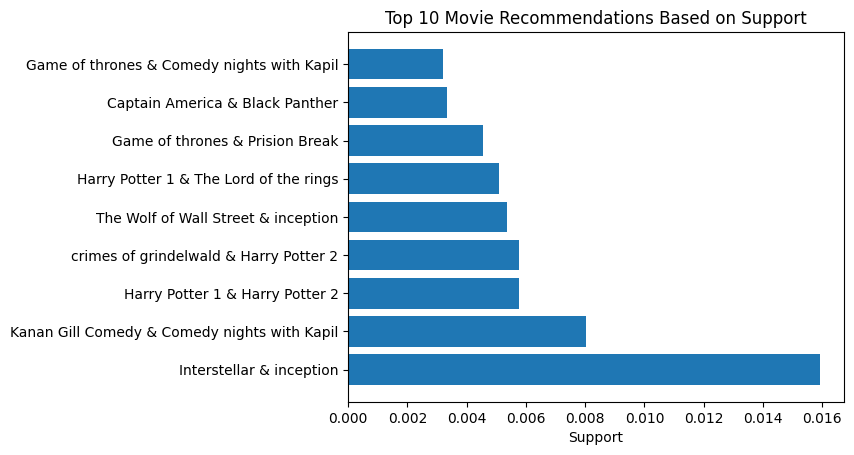

In [ ]:
plt.barh(top_results['Movie 1'] + ' & ' + top_results['Movie 2'], top_results['Support'])
plt.xlabel('Support')
plt.title('Top 10 Movie Recommendations Based on Support')
plt.show()

In [ ]:
resultsinDataFrame.to_csv('Movie_Recommendations.csv', index=False)